# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout,Activation
from sklearn import preprocessing
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
all_df = pd.read_excel("D:\照護司\黑客松\LSTMdatatraing.xlsx")

In [3]:
all_df.sort_values("ID",inplace=True)

## 2000筆假設資料

In [4]:
all_df

,ID,年齡,性別,病症,喝水量,小便失禁,有無異味或灼熱感或體溫過高,病程,時間,處理措施
0,1,70,0,1,2,0,1,1,20190701,3
1000,1,70,0,1,2,0,1,2,20190702,5
1,2,65,1,1,1,0,0,1,20190701,3
1001,2,65,1,1,1,0,0,2,20190702,5
2,3,64,0,3,0,1,0,1,20190701,4
1002,3,64,0,3,0,1,0,2,20190702,6
3,4,62,0,3,0,0,1,1,20190701,4
1003,4,62,0,3,0,0,1,2,20190702,6
4,5,73,0,2,1,0,1,1,20190701,3
1004,5,73,0,2,1,0,1,2,20190702,5


In [5]:
allattr_df = pd.read_excel("D:\照護司\黑客松\LSTMdata_attribute.xlsx")
allattr_df

,Unnamed: 0,0,1,2,3,4,5,6,7
0,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,性別,男,女,NaN,NaN,NaN,NaN,NaN,NaN
2,病症,肺癌,肝癌,皮膚癌,膀胱癌,NaN,NaN,NaN,NaN
3,喝水量,喝少,正常,喝多,NaN,NaN,NaN,NaN,NaN
4,小便失禁,無,有,NaN,NaN,NaN,NaN,NaN,NaN
5,有無異味或灼熱感或體溫過高,無,有,NaN,NaN,NaN,NaN,NaN,NaN
6,病程,病程段1,病程段2,NaN,NaN,NaN,NaN,NaN,NaN
7,時間(yyyymmdd),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,建議處理措施,0,1,2,3,4.0,5.0,6.0,7.0


In [6]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [7]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 2000 train: 1583 test: 417


Data preprocess
將年齡性別給濾除(目前不考慮)

In [8]:
def PreprocessData(raw_df):
    df = raw_df.drop(['年齡'], axis = 1)
    df = df.drop(['性別'], axis = 1)
    df['時間'] = df['時間'] - df['時間'].min()
    x_OneHot_df = pd.get_dummies(data=df,columns=["處理措施"])
    ndarray = x_OneHot_df.values
    Features = ndarray[:,0:6]
    Label = ndarray[:,7:]
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)  
    scaledFeatures = scaledFeatures[:,np.newaxis]
    return scaledFeatures,Label

In [9]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [10]:
test_Label[:1]

array([[0, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

# 3. Create Model 

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [12]:
model = Sequential()

W0719 09:52:54.135423  4624 deprecation_wrapper.py:119] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [13]:
model.add(LSTM(32))

In [14]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=8, 
                kernel_initializer='uniform',
                activation='sigmoid'))

# 4. Train model

In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0719 09:52:54.483864  4624 deprecation_wrapper.py:119] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

W0719 09:52:54.587999  4624 deprecation_wrapper.py:119] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 09:52:54.592005  4624 deprecation_wrapper.py:119] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 09:52:54.980521  4624 deprecation_wrapper.py:119] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0719 09:52:54.988545  4624 deprecation.py:323] From C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, whi

Train on 1424 samples, validate on 159 samples
Epoch 1/30
 - 1s - loss: 0.6612 - acc: 0.8685 - val_loss: 0.5812 - val_acc: 0.8750
Epoch 2/30
 - 0s - loss: 0.4478 - acc: 0.8750 - val_loss: 0.3629 - val_acc: 0.8750
Epoch 3/30
 - 0s - loss: 0.3513 - acc: 0.8750 - val_loss: 0.3422 - val_acc: 0.8750
Epoch 4/30
 - 0s - loss: 0.3414 - acc: 0.8750 - val_loss: 0.3391 - val_acc: 0.8750
Epoch 5/30
 - 0s - loss: 0.3393 - acc: 0.8750 - val_loss: 0.3385 - val_acc: 0.8750
Epoch 6/30
 - 0s - loss: 0.3383 - acc: 0.8750 - val_loss: 0.3376 - val_acc: 0.8750
Epoch 7/30
 - 0s - loss: 0.3372 - acc: 0.8750 - val_loss: 0.3359 - val_acc: 0.8750
Epoch 8/30
 - 0s - loss: 0.3362 - acc: 0.8750 - val_loss: 0.3338 - val_acc: 0.8750
Epoch 9/30
 - 0s - loss: 0.3357 - acc: 0.8750 - val_loss: 0.3354 - val_acc: 0.8750
Epoch 10/30
 - 0s - loss: 0.3346 - acc: 0.8750 - val_loss: 0.3329 - val_acc: 0.8750
Epoch 11/30
 - 0s - loss: 0.3339 - acc: 0.8750 - val_loss: 0.3309 - val_acc: 0.8750
Epoch 12/30
 - 0s - loss: 0.3327 - acc

# 6. Print History

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

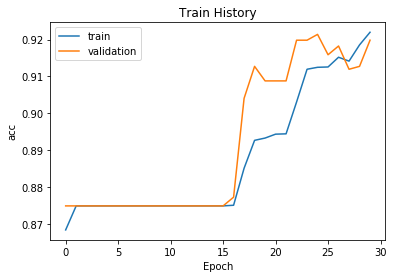

In [19]:
show_train_history(train_history,'acc','val_acc')

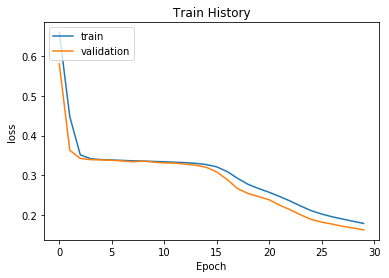

In [20]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

417/417 [==============================] - 0s 38us/step


In [22]:
scores[1]

0.9235611510791367

# 預測資料

# 加入Jason & Michael資料

In [23]:
Jason = pd.Series([1001,65,1,2,0,0,1,1,20190701,0])
Michael = pd.Series([1002,76,0,1,1,1,0,1,20190701,3])

In [24]:
JR_df = pd.DataFrame([list(Jason),list(Michael)],  
                  columns=['ID','年齡','性別','病症','喝水量','小便失禁','有無異味或灼熱感或體溫過高','病程','時間','處理措施'])

In [25]:
all_df=pd.concat([all_df,JR_df])

In [26]:
all_df[-2:]

,ID,年齡,性別,病症,喝水量,小便失禁,有無異味或灼熱感或體溫過高,病程,時間,處理措施
0,1001,65,1,2,0,0,1,1,20190701,0
1,1002,76,0,1,1,1,0,1,20190701,3


# 進行預測

In [27]:
all_Features,Label=PreprocessData(all_df)

In [28]:
all_probability=model.predict_classes(all_Features)

In [29]:
all_probability[:10]

array([3, 5, 3, 5, 0, 6, 0, 0, 3, 5], dtype=int64)

In [30]:
pd=all_df
pd.insert(len(all_df.columns),
          '推薦措施',all_probability)

# 預測Jason & Michael資料的推薦措施

In [31]:
pd[-2:]

,ID,年齡,性別,病症,喝水量,小便失禁,有無異味或灼熱感或體溫過高,病程,時間,處理措施,推薦措施
0,1001,65,1,2,0,0,1,1,20190701,0,0
1,1002,76,0,1,1,1,0,1,20190701,3,3


In [32]:
pd[:100]

,ID,年齡,性別,病症,喝水量,小便失禁,有無異味或灼熱感或體溫過高,病程,時間,處理措施,推薦措施
0,1,70,0,1,2,0,1,1,20190701,3,3
1000,1,70,0,1,2,0,1,2,20190702,5,5
1,2,65,1,1,1,0,0,1,20190701,3,3
1001,2,65,1,1,1,0,0,2,20190702,5,5
2,3,64,0,3,0,1,0,1,20190701,4,0
1002,3,64,0,3,0,1,0,2,20190702,6,6
3,4,62,0,3,0,0,1,1,20190701,4,0
1003,4,62,0,3,0,0,1,2,20190702,6,0
4,5,73,0,2,1,0,1,1,20190701,3,3
1004,5,73,0,2,1,0,1,2,20190702,5,5
